In [7]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# load data set
df = pd.read_csv("data/features.csv")
df = df.iloc[:, 1:]

### Feature Correlation heatmap

/tmp/ipykernel_25777/3884844893.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'chroma_stft_mean'),
  Text(1.5, 0, 'rms_mean'),
  Text(2.5, 0, 'spectral_centroid_mean'),
  Text(3.5, 0, 'spectral_bandwidth_mean'),
  Text(4.5, 0, 'rolloff_mean'),
  Text(5.5, 0, 'zero_crossing_rate_mean'),
  Text(6.5, 0, 'harmony_mean'),
  Text(7.5, 0, 'perceptr_mean'),
  Text(8.5, 0, 'mfcc1_mean'),
  Text(9.5, 0, 'mfcc2_mean'),
  Text(10.5, 0, 'mfcc3_mean'),
  Text(11.5, 0, 'mfcc4_mean'),
  Text(12.5, 0, 'mfcc5_mean'),
  Text(13.5, 0, 'mfcc6_mean'),
  Text(14.5, 0, 'mfcc7_mean'),
  Text(15.5, 0, 'mfcc8_mean'),
  Text(16.5, 0, 'mfcc9_mean'),
  Text(17.5, 0, 'mfcc10_mean'),
  Text(18.5, 0, 'mfcc11_mean'),
  Text(19.5, 0, 'mfcc12_mean'),
  Text(20.5, 0, 'mfcc13_mean'),
  Text(21.5, 0, 'mfcc14_mean'),
  Text(22.5, 0, 'mfcc15_mean'),
  Text(23.5, 0, 'mfcc16_mean'),
  Text(24.5, 0, 

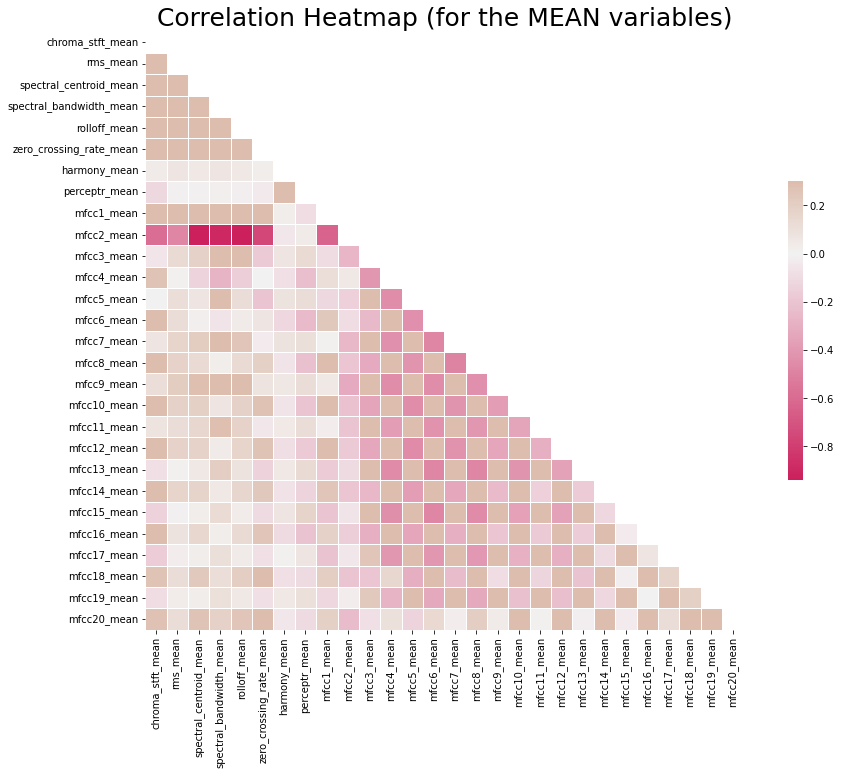

In [9]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)

### box plot for genre distributions

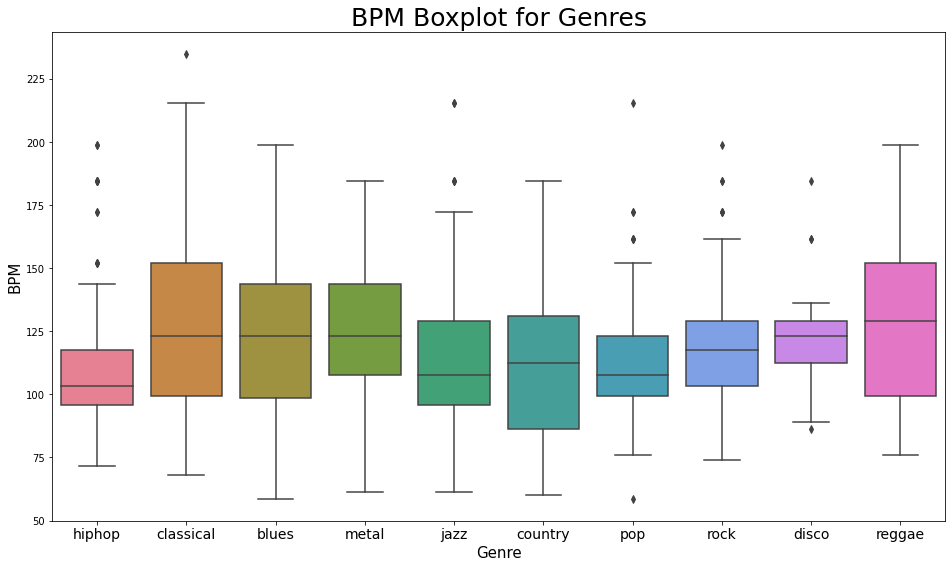

In [11]:
x = df[["label", "bpm"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "bpm", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.show()

### PCA

In [12]:
from sklearn import preprocessing

df = df.iloc[0:, 1:]
y = df['label']
X = df.loc[:, df.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.30861844, 0.28061367])

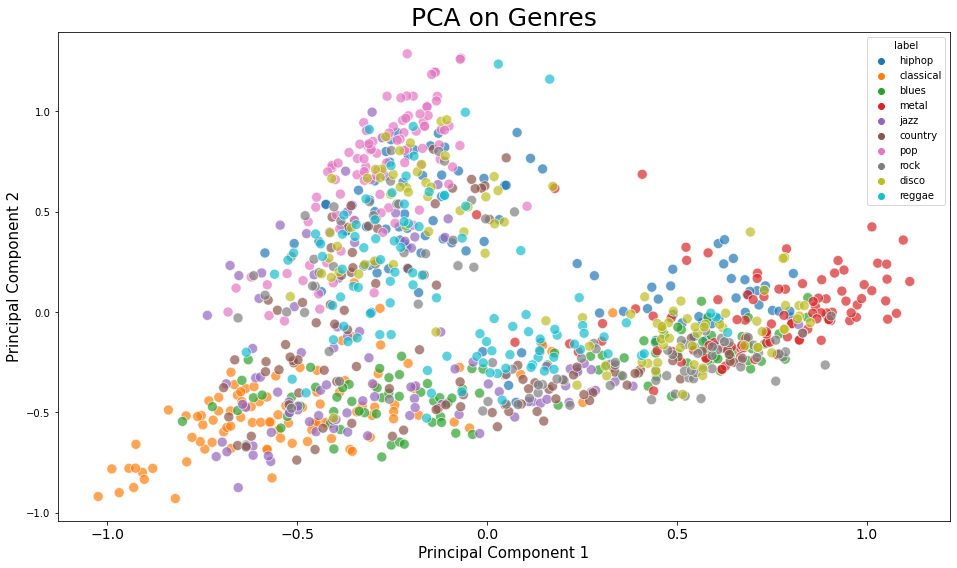

In [13]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100)
plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.show()